In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings('ignore')

import klib

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 3rd month\datasets\classData.csv")

In [17]:
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [9]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)

In [10]:
missing_cols = df.columns[df.isnull().any()]

In [11]:
missing_cols

Index([], dtype='object')

In [23]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [14]:
df.columns.value_counts()

G     1
C     1
B     1
A     1
Ia    1
Ib    1
Ic    1
Va    1
Vb    1
Vc    1
Name: count, dtype: int64

In [15]:
df.nunique()

G        2
C        2
B        2
A        2
Ia    7861
Ib    7861
Ic    7861
Va    7856
Vb    7861
Vc    7847
dtype: int64

In [16]:
df['G'].value_counts()

G
0    4465
1    3396
Name: count, dtype: int64

In [5]:
le = LabelEncoder()

cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
  cardinality = df[col].nunique()
  if cardinality < 5:
    df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)
  elif 5 <= cardinality <= 50:
    df[col] = le.fit_transform(df[col])
  else:  
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)


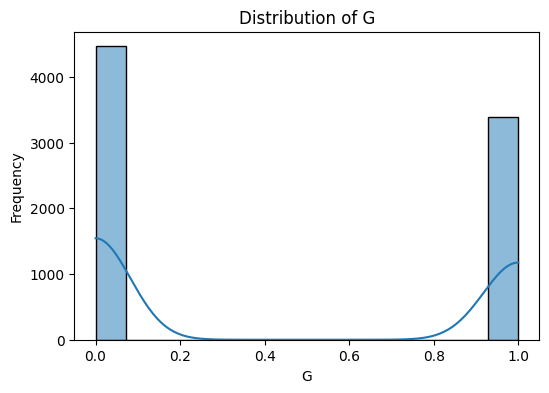

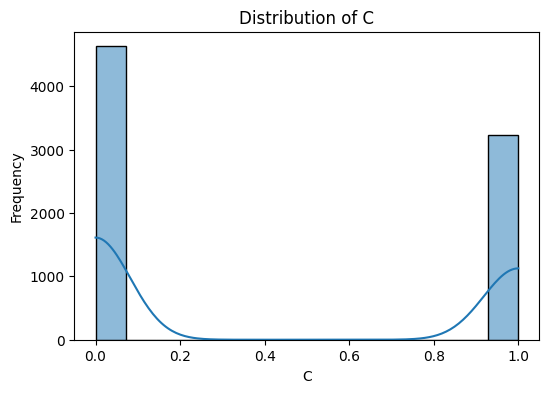

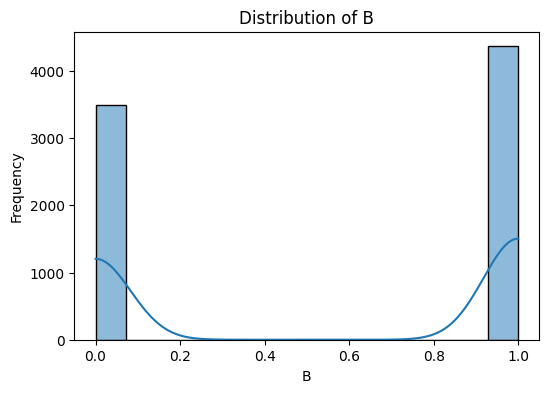

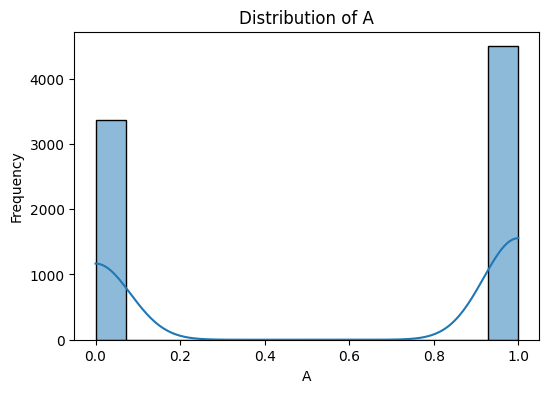

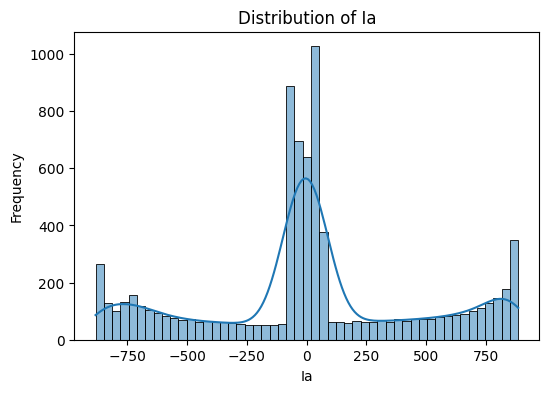

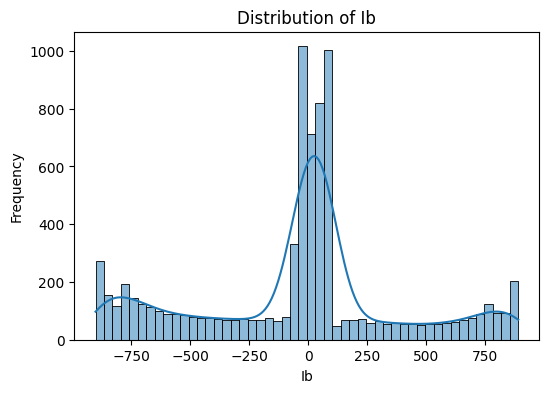

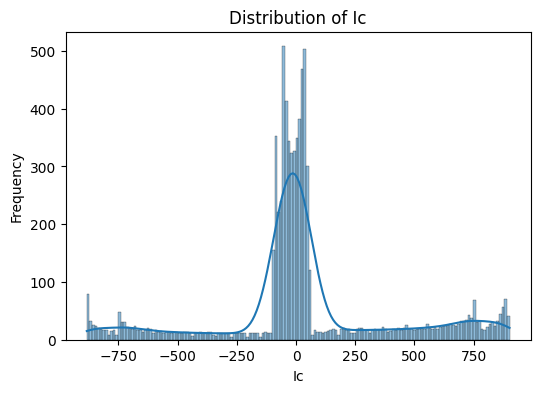

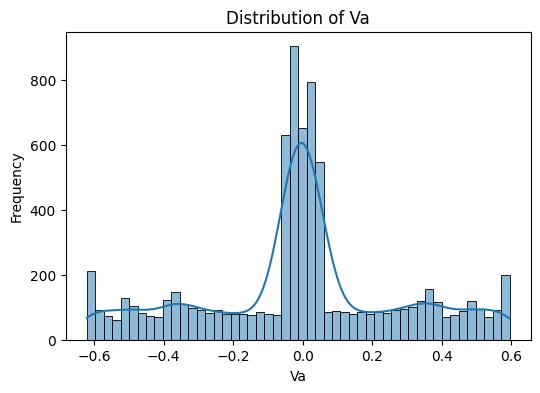

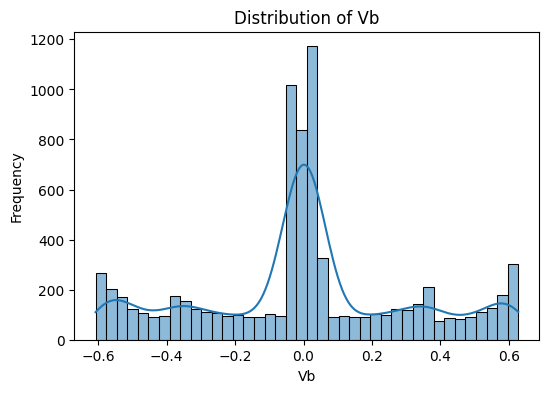

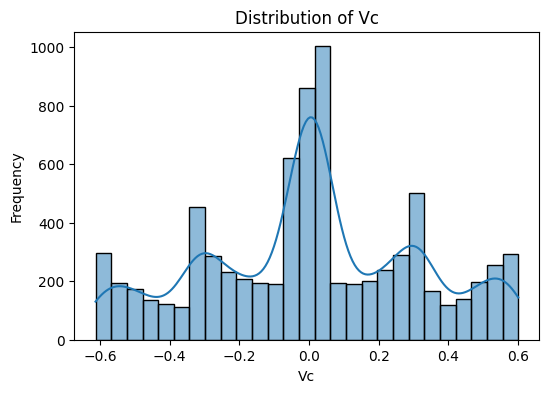

In [19]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [20]:
skewness = df.skew(numeric_only=True)
normal_cols = skewness[abs(skewness) < 0.5].index.to_list()
skewed_cols = skewness[abs(skewness) > 0.5].index.to_list()

In [21]:
print(normal_cols)
print(skewed_cols)

['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
[]


In [3]:
scaler = StandardScaler()
robust = RobustScaler()

num_col = df.select_dtypes(include='number').columns.drop('G')
x = df.drop(columns=['G'])
y = df['G']

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
df = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [34]:
mutual_info = mutual_info_classif(x, y)
mutual_info_df = pd.DataFrame(mutual_info, index=x.columns, columns=['Mutual Info'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Info', ascending=False)
mutual_info_df

,Mutual Info
A,0.363111
Ia,0.301539
Vc,0.257098
Ic,0.181274
Ib,0.146358
Va,0.138968
Vb,0.117676
C,0.019677
B,0.013263


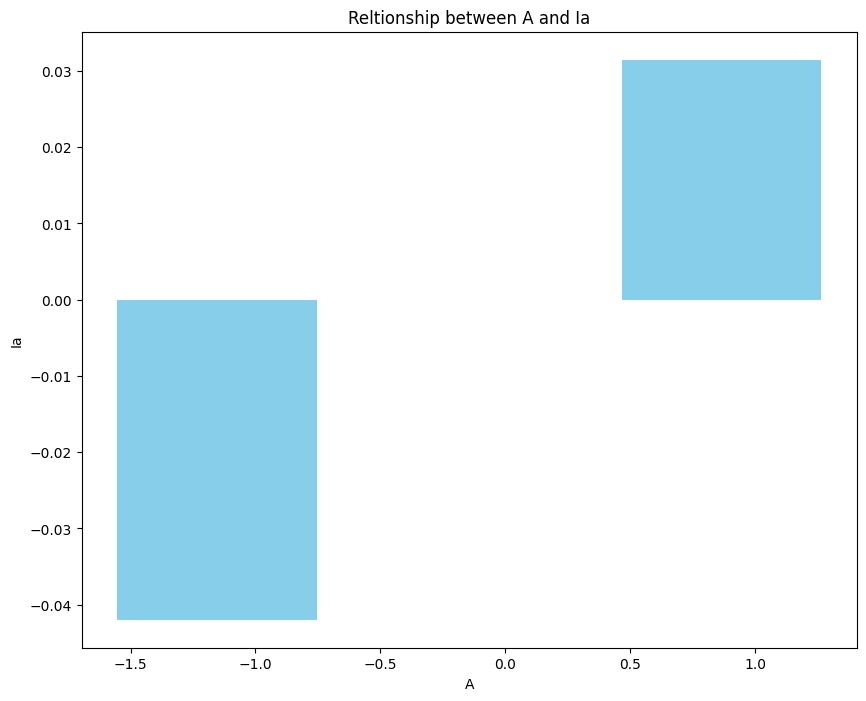

In [ ]:
a_by_la = df.groupby('A')['Ia'].mean().reset_index()

plt.figure(figsize=(10,8))
plt.bar(a_by_la['A'], a_by_la['Ia'], color='skyblue')
plt.xlabel('A')
plt.ylabel('Ia')
plt.title('Reltionship between A and Ia')
plt.show()

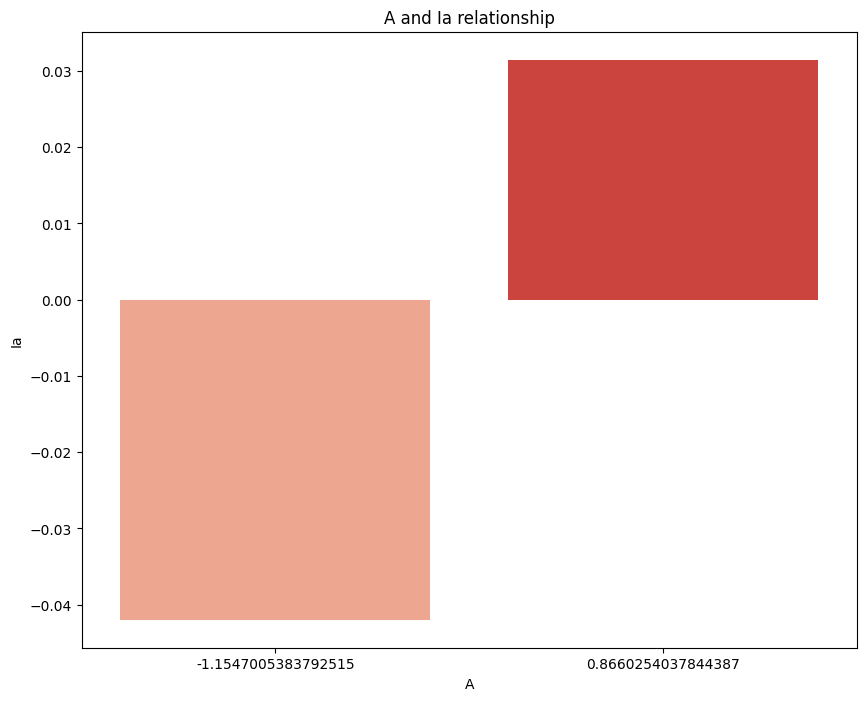

In [40]:
a_by_la = df.groupby('A')['Ia'].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=a_by_la, x='A', y='Ia', palette='Reds')
plt.title('A and Ia relationship')
plt.xlabel('A')
plt.ylabel('Ia')
plt.show()

In [42]:
fig = px.bar(a_by_la, x='A', y='Ia', title='A and Ia', labels={'A': '0', 'Ia': '1'}, color='A')
fig.show()

In [6]:
numerical_features = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

categorical_features = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
  ('num_col', numerical_features, num_col),
  ('cat_col', categorical_features, cat_col)
])

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.21, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
model = DecisionTreeClassifier(random_state=42)

In [9]:
pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('model', model)
])

In [10]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')),
                                                 ('cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [11]:
y_pred = pipeline.predict(x_test)

In [12]:
print(y_test.shape)
print(y_pred.shape)


(825,)
(825,)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.3f}")

0.905
